# Boom Bikes : Understanding demands of bikes

* Problem Statement: We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#### Importing the libraries

In [1175]:
import numpy as np
import pandas as pd

import warnings 
warnings.filterwarnings('ignore')

#### Reading the csv file

In [1176]:
df = pd.read_csv('day.csv')

## Data Understanding

#### First observation of data

In [1177]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1178]:
# checking the shape of the dataset 

df.shape

(730, 16)

* The dataset has 730 rows and 16 columns

#### Identifying types of variables

In [1179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Understanding the data

In [1180]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Droping the unnecessary variables 

 * The decision of dropping the variables was made by looking at the nature of variables and their obvious relation with some other variables in the dataset

In [1181]:
df.drop('instant', axis =1, inplace = True)

In [1182]:
# dropped 'instant' because its a index column and does not have any prediction value

In [1183]:
df.drop('dteday', axis =1, inplace = True)

In [ ]:
# dropped 'dteday' because we have better variables that have information about the date
# the information in 'dteday' thus becomes redundant

In [1185]:
df.drop('casual', axis =1, inplace = True)

In [1186]:
# dropped 'casual' because we have the variable 'cnt' that includes the information we have in 'casual'
# the information in 'casual' thus becomes redundant and will give us the problem of collinearity 

In [1187]:
df.drop('registered', axis =1, inplace = True)

In [1188]:
# dropped 'registered' because we have the variable 'cnt' that includes the information we have in 'registered'
# the information in 'registered' thus becomes redundant and will give us the problem of collinearity 

In [1189]:
df.drop('atemp', axis =1, inplace = True)

In [1190]:
# dropped 'atemp' because we have variable 'temp' which has similar information as 'atemp'

In [1191]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


## Data Visualisation 

#### Understanding type of variables

In [1192]:
import seaborn as sns
import matplotlib.pyplot as plt

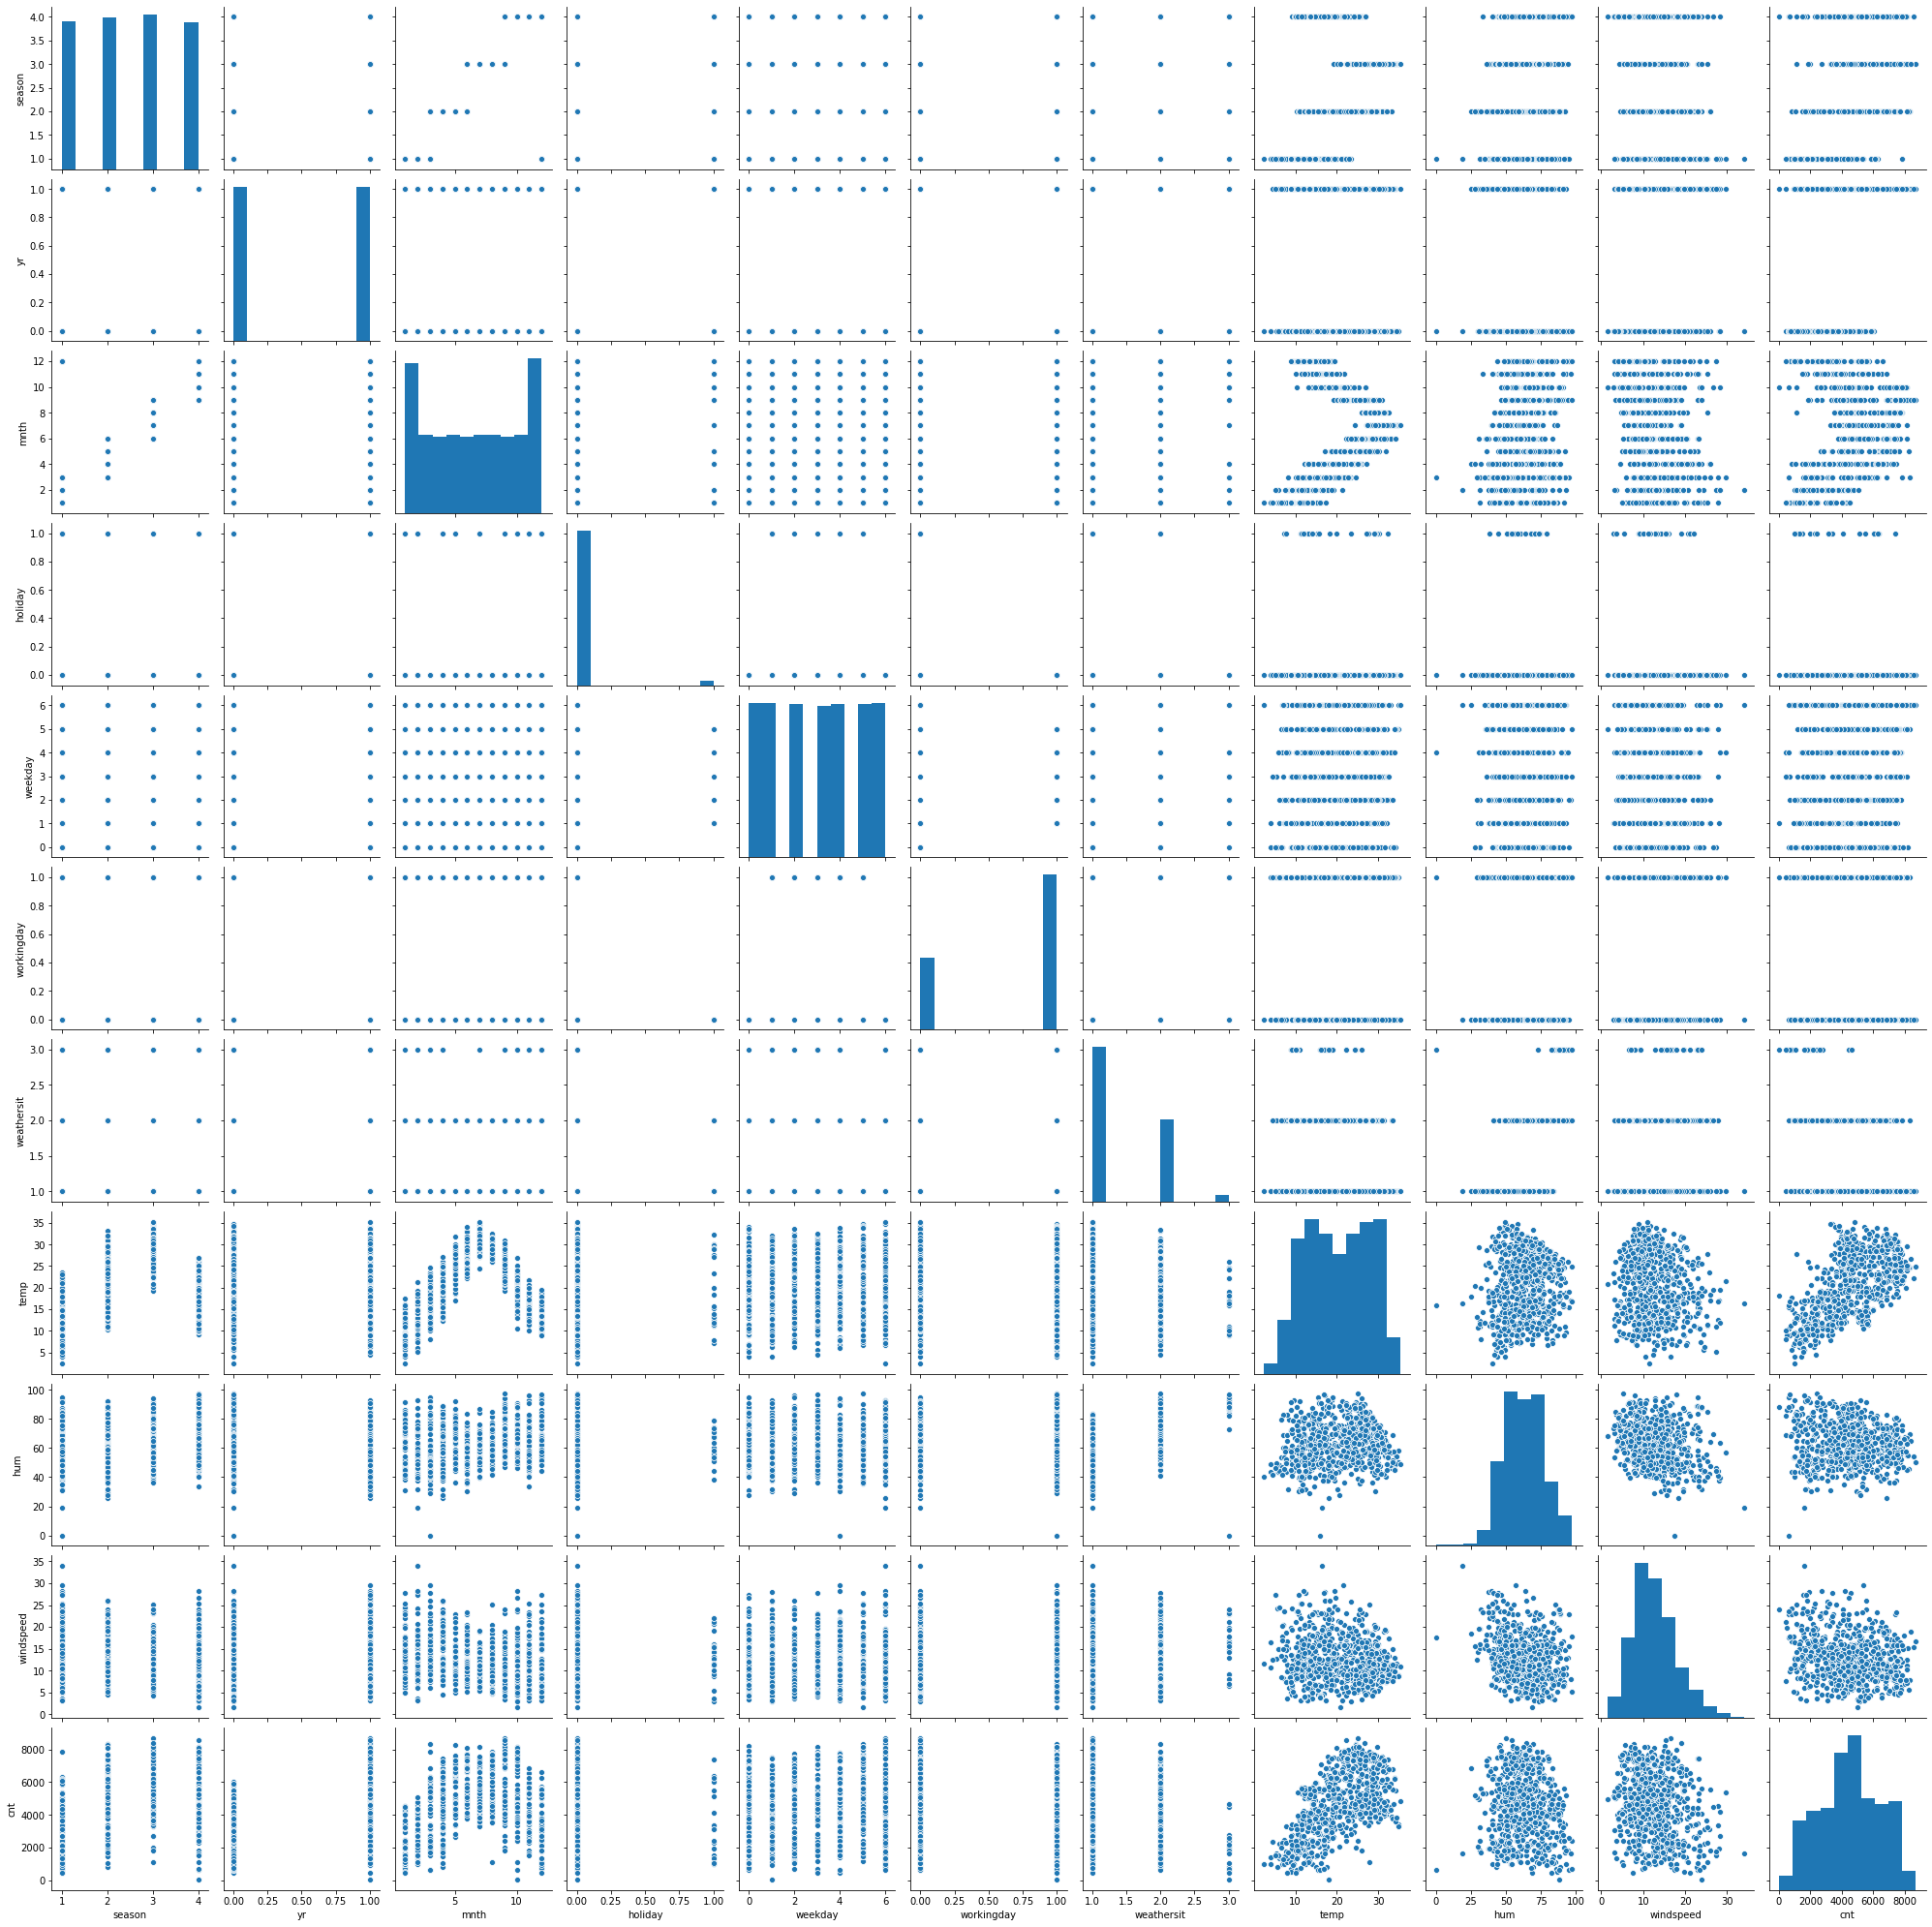

In [1193]:
# checking the relations between the variables in a pairplot 

sns.pairplot(df)
plt.show()

#### Checking the value_counts of the variables

In [1194]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [1195]:
# 'season' is a categorial variable with 4 levels

In [1196]:
df.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [1197]:
# 'yr' is a categorical variable with 2 levels

In [1198]:
df.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [1199]:
# 'mnth' is a categorical variable with 12 levels

In [1200]:
df.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [1201]:
# 'weekday' is a categorical variable with 6 levels

In [1202]:
df.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [1203]:
# 'weekday' is a categorical variable with 2 levels

In [1204]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [1205]:
# 'weathersit' is a categorical variable with 3 levels

In [1206]:
df.temp.value_counts()

10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     1
Name: temp, Length: 498, dtype: int64

In [1207]:
# 'temp' is a numeric variable

In [1208]:
df.hum.value_counts()

61.3333    4
69.7083    3
59.0000    3
57.0000    3
72.9583    3
          ..
64.7917    1
44.9583    1
71.2083    1
50.0417    1
49.8750    1
Name: hum, Length: 594, dtype: int64

In [1209]:
# 'hum' is a numeric variable

In [1210]:
df.windspeed.value_counts()

7.416900     3
15.333486    3
7.959064     3
11.166689    3
7.125450     3
            ..
14.500475    1
8.250514     1
19.416332    1
16.522200    1
9.750175     1
Name: windspeed, Length: 649, dtype: int64

In [1211]:
# 'windspeed' is a continuous variable

In [1212]:
df.cnt.value_counts()

5119    2
4274    2
3784    2
6883    2
2077    2
       ..
6273    1
5501    1
4760    1
1683    1
4097    1
Name: cnt, Length: 695, dtype: int64

In [1213]:
# 'cnt' is a continuous variable

#### Creating a heatmap to find correlation between different variables

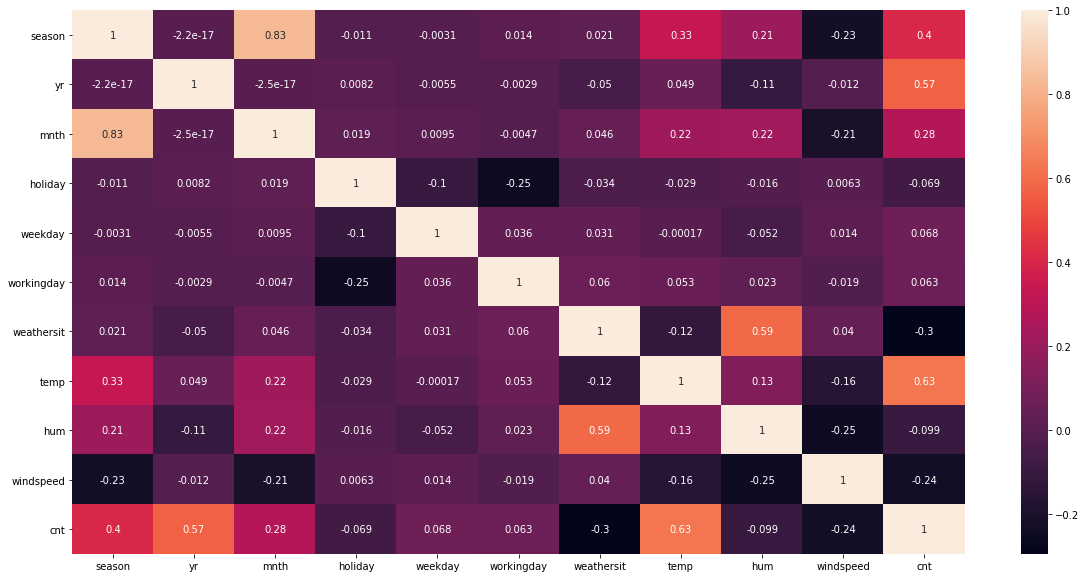

In [1214]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr() , annot = True)
plt.show()

In [1215]:
# our target variable 'cnt' seems to be highly correlated with 'yr','season'and 'temp'

## Data Preperation

In [1216]:
# our categorical variables are 'season','yr','mnth','holiday','weekday','workingday'and 'weathersit'

### Creating specifc labels for categorical variables based on data dictionary

#### Variable one : season

In [1217]:
# creating a function to convert the numeric values to string categories 

def seasonname(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x ==3:
        return 'fall'
    else:
        return 'winter'

In [1218]:
# applying the created function to make a new column 

df['seasons'] = df['season'].apply(seasonname)

In [1219]:
# dropping the 'season' column as we have created a new column to store it data 

df = df.drop('season' , axis =1)

In [1220]:
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,seasons
0,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,spring
1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,spring
2,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,spring
3,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,spring
4,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,spring


#### Variable two : yr

In [1221]:
# creating a function to convert the numeric values to string categories

def yearname(x):
    if x == 0:
        return '2018'
    else:
        return '2019'

In [1222]:
# applying the created function to make a new column 

df['year'] = df['yr'].apply(yearname)

In [1223]:
# dropping the 'yr' column as we have created a new column to store it data 

df = df.drop('yr' , axis =1)

In [1224]:
df.head()

,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,seasons,year
0,1,0,6,0,2,14.110847,80.5833,10.749882,985,spring,2018
1,1,0,0,0,2,14.902598,69.6087,16.652113,801,spring,2018
2,1,0,1,1,1,8.050924,43.7273,16.636703,1349,spring,2018
3,1,0,2,1,1,8.200000,59.0435,10.739832,1562,spring,2018
4,1,0,3,1,1,9.305237,43.6957,12.522300,1600,spring,2018


#### Variable three : mnth

In [1225]:
# creating a function to convert the numeric values to string categories

def monthname(x):
    if x == 1:
        return 'Jan'
    elif x == 2:
        return 'Feb'
    elif x == 3:
        return 'Mar'
    elif x == 4:
        return 'Apr'
    elif x == 5:
        return 'May'
    elif x == 6:
        return 'Jun'
    elif x == 7:
        return 'Jul'
    elif x == 8:
        return 'Aug'
    elif x == 9:
        return 'Sep'
    elif x == 10:
        return 'Oct'
    elif x == 11:
        return 'Nov'
    elif x == 12:
        return 'Dec'

In [1226]:
# applying the created function to make a new column

df['month'] = df['mnth'].apply(monthname)

In [1227]:
# dropping the 'mnth' column as we have created a new column to store it data 

df = df.drop('mnth' , axis =1)

In [1228]:
df.head()

,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,seasons,year,month
0,0,6,0,2,14.110847,80.5833,10.749882,985,spring,2018,Jan
1,0,0,0,2,14.902598,69.6087,16.652113,801,spring,2018,Jan
2,0,1,1,1,8.050924,43.7273,16.636703,1349,spring,2018,Jan
3,0,2,1,1,8.200000,59.0435,10.739832,1562,spring,2018,Jan
4,0,3,1,1,9.305237,43.6957,12.522300,1600,spring,2018,Jan


#### Variable four : holiday

In [1229]:
# creating a function to convert the numeric values to string categories

def holidayname(x):
    if x == 0:
        return 'Holiday'
    else:
        return 'No-Holiday'

In [1230]:
# applying the created function to make a new column

df['holidays'] = df['holiday'].apply(holidayname)

In [1231]:
# dropping the 'holiday' column as we have created a new column to store it data 

df = df.drop('holiday' , axis =1)

In [1232]:
df.head()

,weekday,workingday,weathersit,temp,hum,windspeed,cnt,seasons,year,month,holidays
0,6,0,2,14.110847,80.5833,10.749882,985,spring,2018,Jan,Holiday
1,0,0,2,14.902598,69.6087,16.652113,801,spring,2018,Jan,Holiday
2,1,1,1,8.050924,43.7273,16.636703,1349,spring,2018,Jan,Holiday
3,2,1,1,8.200000,59.0435,10.739832,1562,spring,2018,Jan,Holiday
4,3,1,1,9.305237,43.6957,12.522300,1600,spring,2018,Jan,Holiday


#### Variable five : weekday

In [1233]:
# creating a function to convert the numeric values to string categories

def weekdayname(x):
    if x == 1:
        return 'Mon'
    elif x == 2:
        return 'Tue'
    elif x == 3:
        return 'Wed'
    elif x == 4:
        return 'Thurs'
    elif x == 5:
        return 'Fri'
    elif x == 6:
        return 'Sat'
    else:
        return 'Sun'

In [1234]:
# applying the created function to make a new column

df['weekdays'] = df['weekday'].apply(weekdayname)

In [1235]:
# dropping the 'weekday' column as we have created a new column to store it data 

df = df.drop('weekday' , axis =1)

In [1236]:
df.head()

,workingday,weathersit,temp,hum,windspeed,cnt,seasons,year,month,holidays,weekdays
0,0,2,14.110847,80.5833,10.749882,985,spring,2018,Jan,Holiday,Sat
1,0,2,14.902598,69.6087,16.652113,801,spring,2018,Jan,Holiday,Sun
2,1,1,8.050924,43.7273,16.636703,1349,spring,2018,Jan,Holiday,Mon
3,1,1,8.200000,59.0435,10.739832,1562,spring,2018,Jan,Holiday,Tue
4,1,1,9.305237,43.6957,12.522300,1600,spring,2018,Jan,Holiday,Wed


#### Variable six : workingday

In [1237]:
# creating a function to convert the numeric values to string categories

def workingdayname(x):
    if x == 1:
        return 'working_yes'
    else:
        return 'working_no'

In [1238]:
# applying the created function to make a new column

df['workingdays'] = df['workingday'].apply(workingdayname)

In [1239]:
# dropping the 'workingday' column as we have created a new column to store it data 

df = df.drop('workingday' , axis =1)

In [1240]:
df.head()

,weathersit,temp,hum,windspeed,cnt,seasons,year,month,holidays,weekdays,workingdays
0,2,14.110847,80.5833,10.749882,985,spring,2018,Jan,Holiday,Sat,working_no
1,2,14.902598,69.6087,16.652113,801,spring,2018,Jan,Holiday,Sun,working_no
2,1,8.050924,43.7273,16.636703,1349,spring,2018,Jan,Holiday,Mon,working_yes
3,1,8.200000,59.0435,10.739832,1562,spring,2018,Jan,Holiday,Tue,working_yes
4,1,9.305237,43.6957,12.522300,1600,spring,2018,Jan,Holiday,Wed,working_yes


#### Variable seven : weathersit

In [1241]:
# creating a function to convert the numeric values to string categories

def weathersitname(x):
    if x == 1:
        return 'clear'
    elif x ==2:
        return 'mist'
    elif x ==3:
        return 'light_snow'
    else:
        return 'heavy_rain'

In [1242]:
# applying the created function to make a new column

df['weather'] = df['weathersit'].apply(weathersitname)

In [1243]:
# dropping the 'weathersit' column as we have created a new column to store it data 

df = df.drop('weathersit' , axis =1)

In [1244]:
df.head()

,temp,hum,windspeed,cnt,seasons,year,month,holidays,weekdays,workingdays,weather
0,14.110847,80.5833,10.749882,985,spring,2018,Jan,Holiday,Sat,working_no,mist
1,14.902598,69.6087,16.652113,801,spring,2018,Jan,Holiday,Sun,working_no,mist
2,8.050924,43.7273,16.636703,1349,spring,2018,Jan,Holiday,Mon,working_yes,clear
3,8.200000,59.0435,10.739832,1562,spring,2018,Jan,Holiday,Tue,working_yes,clear
4,9.305237,43.6957,12.522300,1600,spring,2018,Jan,Holiday,Wed,working_yes,clear


### Creating dummy variables for all the categorical variables 

#### Variable one : seasons

In [1245]:
seasons_dummy = pd.get_dummies(df.seasons,drop_first = True)
seasons_dummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


#### Variable two : year

In [1246]:
year_dummy = pd.get_dummies(df.year,drop_first = True)
year_dummy.head()

,2019
0,0
1,0
2,0
3,0
4,0


#### Variable three : month

In [1247]:
month_dummy = pd.get_dummies(df.month,drop_first = True)
month_dummy.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


#### Variable four : holidays

In [1248]:
holidays_dummy = pd.get_dummies(df.holidays,drop_first = True)
holidays_dummy.head()

,No-Holiday
0,0
1,0
2,0
3,0
4,0


#### Variable five : weekdays

In [1249]:
weekdays_dummy = pd.get_dummies(df.weekdays,drop_first = True)
weekdays_dummy.head()

,Mon,Sat,Sun,Thurs,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


#### Variable six : workingdays

In [1250]:
workingdays_dummy = pd.get_dummies(df.workingdays,drop_first = True)
workingdays_dummy.head()

,working_yes
0,0
1,0
2,1
3,1
4,1


#### Variable seven : weather

In [1251]:
weather_dummy = pd.get_dummies(df.weather,drop_first = True)
weather_dummy.head()

,light_snow,mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [1252]:
# concating the dummy dataframe with the original

final = pd.concat([df, seasons_dummy,year_dummy, month_dummy, holidays_dummy , weekdays_dummy,weather_dummy,workingdays_dummy,],axis =1)
final.head()

,temp,hum,windspeed,cnt,seasons,year,month,holidays,weekdays,workingdays,...,No-Holiday,Mon,Sat,Sun,Thurs,Tue,Wed,light_snow,mist,working_yes
0,14.110847,80.5833,10.749882,985,spring,2018,Jan,Holiday,Sat,working_no,...,0,0,1,0,0,0,0,0,1,0
1,14.902598,69.6087,16.652113,801,spring,2018,Jan,Holiday,Sun,working_no,...,0,0,0,1,0,0,0,0,1,0
2,8.050924,43.7273,16.636703,1349,spring,2018,Jan,Holiday,Mon,working_yes,...,0,1,0,0,0,0,0,0,0,1
3,8.200000,59.0435,10.739832,1562,spring,2018,Jan,Holiday,Tue,working_yes,...,0,0,0,0,0,1,0,0,0,1
4,9.305237,43.6957,12.522300,1600,spring,2018,Jan,Holiday,Wed,working_yes,...,0,0,0,0,0,0,1,0,0,1


In [1253]:
# dropping the related variables after creating dummies 

final = final.drop('seasons',axis =1)
final = final.drop('year',axis =1)
final = final.drop('month',axis =1)
final = final.drop('holidays',axis =1)
final = final.drop('workingdays',axis =1)
final = final.drop('weather',axis =1)
final = final.drop('weekdays',axis =1)

In [1254]:
final.head()

,temp,hum,windspeed,cnt,spring,summer,winter,2019,Aug,Dec,...,No-Holiday,Mon,Sat,Sun,Thurs,Tue,Wed,light_snow,mist,working_yes
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [1255]:
final.shape

(730, 29)

### Dividing the data into train and test data

In [1256]:
import sklearn
from sklearn.model_selection import train_test_split

In [1257]:
# dividing the data into train and test split

final_train, final_test = train_test_split(final, train_size = 0.7, random_state = 100)
print(final_train.shape)
print(final_test.shape)

(510, 29)
(220, 29)


### Performing Rescaling of numeric variables

In [1258]:
# we are using a mix-max scalaer for rescaling 

In [1259]:
#importing relevant packages 

from sklearn.preprocessing import MinMaxScaler

In [1260]:
# Instiating scaler object 

scaler = MinMaxScaler()

In [1261]:
# creating a list of numeric variables 

numeric = ['temp','hum','windspeed','cnt']

In [1262]:
# fitting the scaler on the dataframe 

final_train[numeric] = scaler.fit_transform(final_train[numeric])

In [1263]:
final_train.head()

,temp,hum,windspeed,cnt,spring,summer,winter,2019,Aug,Dec,...,No-Holiday,Mon,Sat,Sun,Thurs,Tue,Wed,light_snow,mist,working_yes
576,0.815169,0.725633,0.264686,0.827658,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
426,0.442393,0.640189,0.255342,0.465255,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,0.245101,0.498067,0.663106,0.204096,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
482,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
111,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [1264]:
final_train.describe()

,temp,hum,windspeed,cnt,spring,summer,winter,2019,Aug,Dec,...,No-Holiday,Mon,Sat,Sun,Thurs,Tue,Wed,light_snow,mist,working_yes
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.507843,0.096078,0.084314,...,0.025490,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.676471
std,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.500429,0.294988,0.278131,...,0.157763,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.468282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing the data in x and y 

In [1265]:
y_train = final_train.pop('cnt')
x_train = final_train

In [1266]:
# observing y_train
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [1267]:
# observing x_train
x_train.head()

,temp,hum,windspeed,spring,summer,winter,2019,Aug,Dec,Feb,...,No-Holiday,Mon,Sat,Sun,Thurs,Tue,Wed,light_snow,mist,working_yes
576,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
426,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
728,0.245101,0.498067,0.663106,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
482,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
111,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


## Data Modelling 

In [1268]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1269]:
# adding constant as statsmodel.api doesnot include constants

x_train_sm = sm.add_constant(x_train)

# creating the model based on Ordinary Least Squares 

lr = sm.OLS(y_train,x_train_sm)

# fitting the straight line that best fits to our dataset 

lr_model = lr.fit()

#printing the summary of the model

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.00e-181
Time:                        17:24:34   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2431      0.035      6.888      0.000       0.174       0.312
temp            0.4454      0.046      9.628      0.000       0.354       0.536
hum            -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed      -0.1860      0.026     -7.226      0.000      -0.237      -0.135
spring         -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer          0.0430      0.026      1.645      0.101      -0.008       0.094
winter          0.1076      0.028      3.853      0.000       0.053       0.163
2019            0.2324      0.008     28.819      0.000       0.217       0.248
Aug             0.0204      0.034      0.607      0.544      -0.046       0.086
Dec            -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb            -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan            -0.0633      0.034     -1.885      0.060      -0.129       0.003
Jul            -0.0338      0.035     -0.969      0.333      -0.102       0.035
Jun             0.0046      0.025      0.186      0.853      -0.044       0.053
Mar             0.0013      0.025      0.052      0.959      -0.047       0.050
May             0.0247      0.021      1.173      0.241      -0.017       0.066
Nov            -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct             0.0075      0.036      0.210      0.834      -0.063       0.078
Sep             0.0859      0.032      2.692      0.007       0.023       0.149
No-Holiday      0.0100      0.024      0.418      0.676      -0.037       0.057
Mon            -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat             0.0956      0.014      6.958      0.000       0.069       0.123
Sun             0.0413      0.014      2.964      0.003       0.014       0.069
Thurs          -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue            -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed            -0.0055      0.015     -0.368      0.713      -0.035       0.024
light_snow     -0.2558      0.026     -9.699      0.000      -0.308      -0.204
mist           -0.0596      0.010     -5.709      0.000      -0.080      -0.039
working_yes     0.0962      0.012      7.835      0.000       0.072       0.120
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     1.12e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the co

In [1270]:
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = x_train.columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 

vif

,variables,VIF
27,working_yes,85.54
20,Sat,19.71
21,Sun,18.34
3,spring,10.75
5,winter,9.44
4,summer,8.27
0,temp,7.08
15,Nov,6.79
16,Oct,6.47
7,Aug,6.36


#### Cheking the  data and selecting the variables to remove based on significance

In [1271]:
# 'Mar' has the lowest signifiance amongst the variables

x = x_train.drop('Mar', axis =1)

In [1272]:
x_train_sm = sm.add_constant(x)

lr = sm.OLS(y_train,x_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.87e-182
Time:                        17:24:34   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2437      0.033      7.378      0.000       0.179       0.309
temp            0.4450      0.046      9.763      0.000       0.355       0.535
hum            -0.1513      0.038     -3.942      0.000      -0.227      -0.076
windspeed      -0.1861      0.026     -7.245      0.000      -0.237      -0.136
spring         -0.0443      0.028     -1.563      0.119      -0.100       0.011
summer          0.0427      0.026      1.668      0.096      -0.008       0.093
winter          0.1079      0.027      3.934      0.000       0.054       0.162
2019            0.2324      0.008     28.848      0.000       0.217       0.248
Aug             0.0198      0.032      0.627      0.531      -0.042       0.082
Dec            -0.0454      0.026     -1.748      0.081      -0.096       0.006
Feb            -0.0337      0.022     -1.512      0.131      -0.078       0.010
Jan            -0.0646      0.022     -2.892      0.004      -0.109      -0.021
Jul            -0.0344      0.033     -1.035      0.301      -0.100       0.031
Jun             0.0042      0.023      0.179      0.858      -0.042       0.050
May             0.0243      0.020      1.235      0.218      -0.014       0.063
Nov            -0.0409      0.031     -1.329      0.185      -0.101       0.020
Oct             0.0066      0.031      0.215      0.830      -0.054       0.067
Sep             0.0852      0.029      2.945      0.003       0.028       0.142
No-Holiday      0.0102      0.024      0.427      0.670      -0.037       0.057
Mon            -0.0209      0.015     -1.366      0.173      -0.051       0.009
Sat             0.0957      0.013      7.203      0.000       0.070       0.122
Sun             0.0415      0.014      3.044      0.002       0.015       0.068
Thurs          -0.0091      0.016     -0.587      0.558      -0.040       0.021
Tue            -0.0179      0.015     -1.157      0.248      -0.048       0.013
Wed            -0.0055      0.015     -0.368      0.713      -0.035       0.024
light_snow     -0.2558      0.026     -9.709      0.000      -0.308      -0.204
mist           -0.0596      0.010     -5.716      0.000      -0.080      -0.039
working_yes     0.0963      0.012      8.149      0.000       0.073       0.120
==============================================================================
Omnibus:                       83.692   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.031
Skew:                          -0.798   Prob(JB):                     4.12e-51
Kurtosis:                       5.893   Cond. No.                     9.72e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalu

* Note : VIF was checked and the code block for VIF was removed for better readability of the code

#### Removing the next variable based on significance

In [1273]:
# 'Jun' has the lowest signifiance amongst the variables

x = x.drop('Jun', axis =1)

In [1274]:
x_train_sm = sm.add_constant(x)

lr = sm.OLS(y_train,x_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.72e-183
Time:                        17:24:35   Log-Likelihood:                 527.01
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -891.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2442      0.033      7.428      0.000       0.180       0.309
temp            0.4493      0.039     11.630      0.000       0.373       0.525
hum            -0.1521      0.038     -3.990      0.000      -0.227      -0.077
windspeed      -0.1865      0.026     -7.302      0.000      -0.237      -0.136
spring         -0.0459      0.027     -1.704      0.089      -0.099       0.007
summer          0.0416      0.025      1.678      0.094      -0.007       0.090
winter          0.1070      0.027      3.972      0.000       0.054       0.160
2019            0.2323      0.008     28.999      0.000       0.217       0.248
Aug             0.0163      0.025      0.656      0.512      -0.033       0.065
Dec            -0.0457      0.026     -1.768      0.078      -0.097       0.005
Feb            -0.0334      0.022     -1.504      0.133      -0.077       0.010
Jan            -0.0640      0.022     -2.902      0.004      -0.107      -0.021
Jul            -0.0381      0.026     -1.481      0.139      -0.089       0.012
May             0.0226      0.017      1.305      0.192      -0.011       0.057
Nov            -0.0417      0.030     -1.370      0.171      -0.101       0.018
Oct             0.0052      0.030      0.176      0.860      -0.053       0.064
Sep             0.0825      0.024      3.381      0.001       0.035       0.130
No-Holiday      0.0101      0.024      0.423      0.672      -0.037       0.057
Mon            -0.0209      0.015     -1.364      0.173      -0.051       0.009
Sat             0.0960      0.013      7.265      0.000       0.070       0.122
Sun             0.0417      0.014      3.077      0.002       0.015       0.068
Thurs          -0.0091      0.015     -0.589      0.556      -0.040       0.021
Tue            -0.0180      0.015     -1.160      0.247      -0.048       0.012
Wed            -0.0054      0.015     -0.365      0.715      -0.035       0.024
light_snow     -0.2557      0.026     -9.717      0.000      -0.307      -0.204
mist           -0.0595      0.010     -5.720      0.000      -0.080      -0.039
working_yes     0.0965      0.012      8.186      0.000       0.073       0.120
==============================================================================
Omnibus:                       83.211   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.904
Skew:                          -0.796   Prob(JB):                     1.97e-50
Kurtosis:                       5.870   Cond. No.                     5.71e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.86e-29. This might indicate that there are
strong multicollinearity probl

* Note : VIF was checked and the block was removed for better readability of the code

#### Removing the next variable based on significance

In [1275]:
# 'Oct' has the lowest signifiance amongst the variables

x = x.drop('Oct', axis =1)

In [1276]:
x_train_sm = sm.add_constant(x)

lr = sm.OLS(y_train,x_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.53e-184
Time:                        17:24:35   Log-Likelihood:                 526.99
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2453      0.032      7.603      0.000       0.182       0.309
temp            0.4487      0.038     11.669      0.000       0.373       0.524
hum            -0.1512      0.038     -4.003      0.000      -0.225      -0.077
windspeed      -0.1862      0.025     -7.313      0.000      -0.236      -0.136
spring         -0.0466      0.027     -1.747      0.081      -0.099       0.006
summer          0.0401      0.023      1.722      0.086      -0.006       0.086
winter          0.1096      0.023      4.826      0.000       0.065       0.154
2019            0.2323      0.008     29.032      0.000       0.217       0.248
Aug             0.0150      0.024      0.633      0.527      -0.031       0.061
Dec            -0.0490      0.018     -2.689      0.007      -0.085      -0.013
Feb            -0.0344      0.021     -1.602      0.110      -0.077       0.008
Jan            -0.0650      0.021     -3.059      0.002      -0.107      -0.023
Jul            -0.0395      0.025     -1.600      0.110      -0.088       0.009
May             0.0226      0.017      1.307      0.192      -0.011       0.057
Nov            -0.0459      0.019     -2.421      0.016      -0.083      -0.009
Sep             0.0804      0.021      3.748      0.000       0.038       0.123
No-Holiday      0.0107      0.024      0.453      0.651      -0.036       0.057
Mon            -0.0209      0.015     -1.370      0.171      -0.051       0.009
Sat             0.0961      0.013      7.298      0.000       0.070       0.122
Sun             0.0419      0.013      3.105      0.002       0.015       0.068
Thurs          -0.0092      0.015     -0.591      0.555      -0.040       0.021
Tue            -0.0180      0.015     -1.164      0.245      -0.048       0.012
Wed            -0.0055      0.015     -0.367      0.714      -0.035       0.024
light_snow     -0.2556      0.026     -9.726      0.000      -0.307      -0.204
mist           -0.0595      0.010     -5.737      0.000      -0.080      -0.039
working_yes     0.0966      0.012      8.230      0.000       0.074       0.120
==============================================================================
Omnibus:                       82.670   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.459
Skew:                          -0.792   Prob(JB):                     6.69e-50
Kurtosis:                       5.854   Cond. No.                     5.59e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.05e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* Note : VIF was checked and the block was removed for better readability of the code

#### Removing the next variable based on significance

In [1277]:
# 'Wed' has the lowest signifiance amongst the variables

x = x.drop('Wed', axis =1)

In [1278]:
x_train_sm = sm.add_constant(x)

lr = sm.OLS(y_train,x_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.42e-185
Time:                        17:24:35   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2447      0.032      7.601      0.000       0.181       0.308
temp            0.4483      0.038     11.674      0.000       0.373       0.524
hum            -0.1518      0.038     -4.025      0.000      -0.226      -0.078
windspeed      -0.1862      0.025     -7.319      0.000      -0.236      -0.136
spring         -0.0467      0.027     -1.755      0.080      -0.099       0.006
summer          0.0399      0.023      1.716      0.087      -0.006       0.086
winter          0.1095      0.023      4.830      0.000       0.065       0.154
2019            0.2322      0.008     29.055      0.000       0.217       0.248
Aug             0.0151      0.024      0.638      0.524      -0.031       0.061
Dec            -0.0489      0.018     -2.689      0.007      -0.085      -0.013
Feb            -0.0344      0.021     -1.603      0.110      -0.076       0.008
Jan            -0.0651      0.021     -3.067      0.002      -0.107      -0.023
Jul            -0.0392      0.025     -1.591      0.112      -0.088       0.009
May             0.0227      0.017      1.311      0.191      -0.011       0.057
Nov            -0.0462      0.019     -2.443      0.015      -0.083      -0.009
Sep             0.0803      0.021      3.746      0.000       0.038       0.122
No-Holiday      0.0092      0.023      0.398      0.691      -0.036       0.055
Mon            -0.0179      0.013     -1.389      0.165      -0.043       0.007
Sat             0.0974      0.013      7.663      0.000       0.072       0.122
Sun             0.0432      0.013      3.313      0.001       0.018       0.069
Thurs          -0.0061      0.013     -0.467      0.640      -0.032       0.020
Tue            -0.0150      0.013     -1.145      0.253      -0.041       0.011
light_snow     -0.2563      0.026     -9.782      0.000      -0.308      -0.205
mist           -0.0593      0.010     -5.730      0.000      -0.080      -0.039
working_yes     0.0949      0.011      8.858      0.000       0.074       0.116
==============================================================================
Omnibus:                       82.216   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.232
Skew:                          -0.788   Prob(JB):                     1.23e-49
Kurtosis:                       5.849   Cond. No.                     5.59e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  5e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Removing the next variable based on significance

In [1279]:
# 'No-Holiday' has the lowest signifiance amongst the variables

x = x.drop('No-Holiday', axis =1)

In [1280]:
x_train_sm = sm.add_constant(x)

lr = sm.OLS(y_train,x_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.42e-185
Time:                        17:24:35   Log-Likelihood:                 526.92
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2539      0.048      5.250      0.000       0.159       0.349
temp            0.4483      0.038     11.674      0.000       0.373       0.524
hum            -0.1518      0.038     -4.025      0.000      -0.226      -0.078
windspeed      -0.1862      0.025     -7.319      0.000      -0.236      -0.136
spring         -0.0467      0.027     -1.755      0.080      -0.099       0.006
summer          0.0399      0.023      1.716      0.087      -0.006       0.086
winter          0.1095      0.023      4.830      0.000       0.065       0.154
2019            0.2322      0.008     29.055      0.000       0.217       0.248
Aug             0.0151      0.024      0.638      0.524      -0.031       0.061
Dec            -0.0489      0.018     -2.689      0.007      -0.085      -0.013
Feb            -0.0344      0.021     -1.603      0.110      -0.076       0.008
Jan            -0.0651      0.021     -3.067      0.002      -0.107      -0.023
Jul            -0.0392      0.025     -1.591      0.112      -0.088       0.009
May             0.0227      0.017      1.311      0.191      -0.011       0.057
Nov            -0.0462      0.019     -2.443      0.015      -0.083      -0.009
Sep             0.0803      0.021      3.746      0.000       0.038       0.122
Mon            -0.0179      0.013     -1.389      0.165      -0.043       0.007
Sat             0.0881      0.029      3.043      0.002       0.031       0.145
Sun             0.0339      0.029      1.168      0.244      -0.023       0.091
Thurs          -0.0061      0.013     -0.467      0.640      -0.032       0.020
Tue            -0.0150      0.013     -1.145      0.253      -0.041       0.011
light_snow     -0.2563      0.026     -9.782      0.000      -0.308      -0.205
mist           -0.0593      0.010     -5.730      0.000      -0.080      -0.039
working_yes     0.0856      0.026      3.248      0.001       0.034       0.137
==============================================================================
Omnibus:                       82.216   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.232
Skew:                          -0.788   Prob(JB):                     1.23e-49
Kurtosis:                       5.849   Cond. No.                         30.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Removing the next variable based on significance

In [1281]:
# 'Thurs' has the lowest signifiance amongst the variables

x = x.drop('Thurs', axis =1)

In [1282]:
x_train_sm = sm.add_constant(x)

lr = sm.OLS(y_train,x_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.36e-186
Time:                        17:24:35   Log-Likelihood:                 526.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2512      0.048      5.235      0.000       0.157       0.345
temp            0.4484      0.038     11.686      0.000       0.373       0.524
hum            -0.1516      0.038     -4.024      0.000      -0.226      -0.078
windspeed      -0.1863      0.025     -7.327      0.000      -0.236      -0.136
spring         -0.0466      0.027     -1.753      0.080      -0.099       0.006
summer          0.0401      0.023      1.726      0.085      -0.006       0.086
winter          0.1099      0.023      4.851      0.000       0.065       0.154
2019            0.2322      0.008     29.077      0.000       0.217       0.248
Aug             0.0152      0.024      0.645      0.520      -0.031       0.062
Dec            -0.0492      0.018     -2.709      0.007      -0.085      -0.014
Feb            -0.0340      0.021     -1.590      0.112      -0.076       0.008
Jan            -0.0650      0.021     -3.066      0.002      -0.107      -0.023
Jul            -0.0389      0.025     -1.583      0.114      -0.087       0.009
May             0.0228      0.017      1.317      0.188      -0.011       0.057
Nov            -0.0466      0.019     -2.472      0.014      -0.084      -0.010
Sep             0.0803      0.021      3.747      0.000       0.038       0.122
Mon            -0.0160      0.012     -1.310      0.191      -0.040       0.008
Sat             0.0905      0.028      3.175      0.002       0.034       0.146
Sun             0.0363      0.029      1.268      0.205      -0.020       0.092
Tue            -0.0131      0.012     -1.052      0.293      -0.037       0.011
light_snow     -0.2565      0.026     -9.797      0.000      -0.308      -0.205
mist           -0.0591      0.010     -5.719      0.000      -0.079      -0.039
working_yes     0.0861      0.026      3.269      0.001       0.034       0.138
==============================================================================
Omnibus:                       82.702   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.333
Skew:                          -0.792   Prob(JB):                     4.32e-50
Kurtosis:                       5.862   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Using RFE to select 10 variables 

In [1283]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

In [1284]:
lm = LinearRegression()
lm.fit(x,y_train)

# running RFE and selecting 10 variables 

rfe = RFE(lm,10)
rfe = rfe.fit(x,y_train)

In [1285]:
# checking if particular variable was selected or not 

list(zip(x.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', False, 4),
 ('2019', True, 1),
 ('Aug', False, 11),
 ('Dec', False, 8),
 ('Feb', False, 9),
 ('Jan', False, 6),
 ('Jul', True, 1),
 ('May', False, 10),
 ('Nov', False, 7),
 ('Sep', True, 1),
 ('Mon', False, 12),
 ('Sat', True, 1),
 ('Sun', False, 3),
 ('Tue', False, 13),
 ('light_snow', True, 1),
 ('mist', True, 1),
 ('working_yes', False, 2)]

In [1286]:
# making a list of 15 variables 

col = x.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'spring', '2019', 'Jul', 'Sep', 'Sat',
       'light_snow', 'mist'],
      dtype='object')

In [1287]:
final_df = x[col]

In [1288]:
final_df.head()

,temp,hum,windspeed,spring,2019,Jul,Sep,Sat,light_snow,mist
576,0.815169,0.725633,0.264686,0,1,1,0,0,0,0
426,0.442393,0.640189,0.255342,1,1,0,0,1,0,1
728,0.245101,0.498067,0.663106,1,1,0,0,0,0,0
482,0.395666,0.504508,0.188475,0,1,0,0,1,0,1
111,0.345824,0.751824,0.380981,0,0,0,0,0,0,1


#### Creating a model based on the dataframe obtained after RPE

In [1289]:
import statsmodels.api as sm

In [1290]:
# adding constant as statsmodel.api doesnot include constants

x_train_sm = sm.add_constant(final_df)

# creating the model based on Ordinary Least Squares 

lr = sm.OLS(y_train,x_train_sm)

# fitting the straight line that best fits to our dataset 

lr_model = lr.fit()

#printing the summary of the model

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          4.32e-184
Time:                        17:24:35   Log-Likelihood:                 489.01
No. Observations:                 510   AIC:                            -956.0
Df Residuals:                     499   BIC:                            -909.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3764      0.030     12.424      0.000       0.317       0.436
temp           0.4109      0.027     15.492      0.000       0.359       0.463
hum           -0.1272      0.038     -3.315      0.001      -0.203      -0.052
windspeed     -0.1799      0.026     -6.798      0.000      -0.232      -0.128
spring        -0.1479      0.012    -11.914      0.000      -0.172      -0.123
2019           0.2331      0.008     27.647      0.000       0.217       0.250
Jul           -0.0796      0.018     -4.477      0.000      -0.114      -0.045
Sep            0.0552      0.016      3.440      0.001       0.024       0.087
Sat            0.0212      0.012      1.843      0.066      -0.001       0.044
light_snow    -0.2389      0.027     -8.738      0.000      -0.293      -0.185
mist          -0.0589      0.011     -5.455      0.000      -0.080      -0.038
==============================================================================
Omnibus:                       59.721   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.340
Skew:                          -0.647   Prob(JB):                     4.98e-29
Kurtosis:                       5.112   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Removing a variable based on significance

In [1291]:
# 'Sat' has the lowest signifiance amongst the variables

final_df = final_df.drop('Sat', axis =1)

In [1292]:
x_train_sm = sm.add_constant(final_df)

lr = sm.OLS(y_train,x_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     266.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.39e-184
Time:                        17:24:35   Log-Likelihood:                 487.28
No. Observations:                 510   AIC:                            -954.6
Df Residuals:                     500   BIC:                            -912.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3820      0.030     12.644      0.000       0.323       0.441
temp           0.4097      0.027     15.414      0.000       0.358       0.462
hum           -0.1305      0.038     -3.396      0.001      -0.206      -0.055
windspeed     -0.1786      0.027     -6.735      0.000      -0.231      -0.126
spring        -0.1481      0.012    -11.904      0.000      -0.173      -0.124
2019           0.2326      0.008     27.536      0.000       0.216       0.249
Jul           -0.0791      0.018     -4.439      0.000      -0.114      -0.044
Sep            0.0554      0.016      3.449      0.001       0.024       0.087
light_snow    -0.2373      0.027     -8.663      0.000      -0.291      -0.183
mist          -0.0582      0.011     -5.383      0.000      -0.079      -0.037
==============================================================================
Omnibus:                       53.880   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.857
Skew:                          -0.563   Prob(JB):                     2.84e-28
Kurtosis:                       5.168   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking the VIF

In [1293]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1294]:
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = final_df.columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(final_df.values,i) for i in range (final_df.shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 

vif

,variables,VIF
1,hum,14.87
0,temp,11.88
2,windspeed,3.95
8,mist,2.11
4,2019,2.03
3,spring,1.84
5,Jul,1.40
6,Sep,1.20
7,light_snow,1.20


#### Dropping the variables with high VIF as all the variables are significant based on p-value

In [1295]:
# The variable with highest VIF is 'hum'

In [1296]:
final_df = final_df.drop('hum', axis =1)

## Creating the Final Model

In [1297]:
x_train_sm = sm.add_constant(final_df)

lr = sm.OLS(y_train,x_train_sm)

### The final model

In [1298]:
lr_model = lr.fit()

### The final model summary

In [1299]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     292.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.31e-183
Time:                        17:24:35   Log-Likelihood:                 481.47
No. Observations:                 510   AIC:                            -944.9
Df Residuals:                     501   BIC:                            -906.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3021      0.019     15.795      0.000       0.264       0.340
temp           0.3953      0.027     14.909      0.000       0.343       0.447
windspeed     -0.1516      0.026     -5.930      0.000      -0.202      -0.101
spring        -0.1456      0.013    -11.601      0.000      -0.170      -0.121
2019           0.2355      0.008     27.742      0.000       0.219       0.252
Jul           -0.0728      0.018     -4.064      0.000      -0.108      -0.038
Sep            0.0528      0.016      3.257      0.001       0.021       0.085
light_snow    -0.2742      0.025    -10.797      0.000      -0.324      -0.224
mist          -0.0789      0.009     -8.740      0.000      -0.097      -0.061
==============================================================================
Omnibus:                       57.146   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.269
Skew:                          -0.599   Prob(JB):                     1.15e-29
Kurtosis:                       5.199   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The VIF is variables in the final model 

In [1300]:
vif = pd.DataFrame()

vif['variables'] = final_df.columns

vif['VIF'] = [variance_inflation_factor(final_df.values,i) for i in range (final_df.shape[1])]

vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF' , ascending = False)

vif

,variables,VIF
0,temp,4.60
1,windspeed,3.81
3,2019,2.03
2,spring,1.51
7,mist,1.49
4,Jul,1.33
5,Sep,1.20
6,light_snow,1.06


In [1301]:
# calculating the predicted values based on the training set 

y_train_pred = lr_model.predict(x_train_sm)

## Model Evaluation 

#### Checking for assumptions

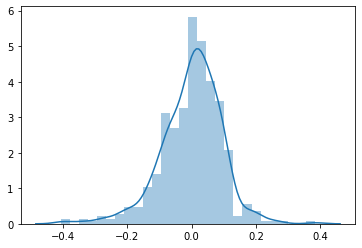

In [1302]:
# computing the residuals (error in prediction) 

res = y_train - y_train_pred

# Checking the assumption : if the distribution of residual terms are centered around zero and is approximately normal 
sns.distplot(res)
plt.show()

* Assumption One : The error terms are normally distributed 
* Assumption Two : The mean of the error terms is roughly around zero 

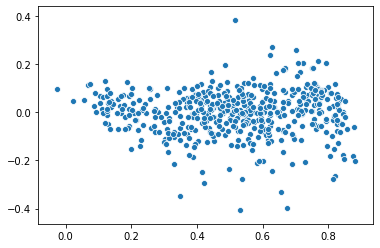

In [1303]:
# Checking the assumption : If the residuals are randomly distributed 

sns.scatterplot(y_train_pred,res)
plt.show()

* Assumption Three : The residual terms are randomly distributed 

In [1304]:
# Checking the assumption : The final model variables do not posses multicollinearity

vif = pd.DataFrame()

vif['variables'] = final_df.columns

vif['VIF'] = [variance_inflation_factor(final_df.values,i) for i in range (final_df.shape[1])]

vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF' , ascending = False)

vif

,variables,VIF
0,temp,4.60
1,windspeed,3.81
3,2019,2.03
2,spring,1.51
7,mist,1.49
4,Jul,1.33
5,Sep,1.20
6,light_snow,1.06


* Assumption Four: All the variables have VIF below 5 so they do not posses multicollinearity 

### Prediction on the test set 

In [1305]:
final_test.shape

(220, 29)

In [1306]:
final_test.head()

,temp,hum,windspeed,cnt,spring,summer,winter,2019,Aug,Dec,...,No-Holiday,Mon,Sat,Sun,Thurs,Tue,Wed,light_snow,mist,working_yes
184,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
535,32.082500,59.2083,7.625404,6211,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
299,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1
221,31.433347,42.4167,13.417286,4780,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
152,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [1307]:
final_test[numeric] = scaler.fit_transform(final_test[numeric])

In [1308]:
final_test.head()

,temp,hum,windspeed,cnt,spring,summer,winter,2019,Aug,Dec,...,No-Holiday,Mon,Sat,Sun,Thurs,Tue,Wed,light_snow,mist,working_yes
184,0.837241,0.534223,0.149393,0.704300,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
535,0.911423,0.470417,0.231142,0.725421,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
299,0.496221,0.777843,0.443398,0.278853,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1
221,0.890387,0.236659,0.449707,0.545512,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
152,0.821739,0.070765,0.682387,0.569148,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [1309]:
# making a list of the variables that appear in the final model 

var = ['temp','windspeed','spring','2019','Jul','Sep','light_snow','mist','cnt']

In [1310]:
pred_df = final_test[var]

In [1311]:
final_df.head()

,temp,windspeed,spring,2019,Jul,Sep,light_snow,mist
576,0.815169,0.264686,0,1,1,0,0,0
426,0.442393,0.255342,1,1,0,0,0,1
728,0.245101,0.663106,1,1,0,0,0,0
482,0.395666,0.188475,0,1,0,0,0,1
111,0.345824,0.380981,0,0,0,0,0,1


In [1312]:
pred_df.head()

,temp,windspeed,spring,2019,Jul,Sep,light_snow,mist,cnt
184,0.837241,0.149393,0,0,1,0,0,1,0.704300
535,0.911423,0.231142,0,1,0,0,0,0,0.725421
299,0.496221,0.443398,0,0,0,0,0,1,0.278853
221,0.890387,0.449707,0,0,0,0,0,0,0.545512
152,0.821739,0.682387,0,0,0,0,0,0,0.569148


In [1313]:
y_test = pred_df.pop('cnt')

In [1314]:
y_test.head()

184    0.704300
535    0.725421
299    0.278853
221    0.545512
152    0.569148
Name: cnt, dtype: float64

In [1315]:
x_test = pred_df

In [1316]:
x_test.head()

,temp,windspeed,spring,2019,Jul,Sep,light_snow,mist
184,0.837241,0.149393,0,0,1,0,0,1
535,0.911423,0.231142,0,1,0,0,0,0
299,0.496221,0.443398,0,0,0,0,0,1
221,0.890387,0.449707,0,0,0,0,0,0
152,0.821739,0.682387,0,0,0,0,0,0


In [1317]:
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,temp,windspeed,spring,2019,Jul,Sep,light_snow,mist
184,1.0,0.837241,0.149393,0,0,1,0,0,1
535,1.0,0.911423,0.231142,0,1,0,0,0,0
299,1.0,0.496221,0.443398,0,0,0,0,0,1
221,1.0,0.890387,0.449707,0,0,0,0,0,0
152,1.0,0.821739,0.682387,0,0,0,0,0,0


#### Making the predictions of the test set using the model 

In [1318]:
y_test_pred = lr_model.predict(x_test_sm)

#### Evalutation of the model based on predicted and test data 

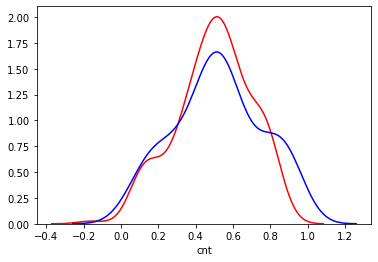

In [1319]:
# creating the plot to measure the quality of prediction by the model  

sns.distplot(y_test_pred , color = 'red', hist = False)
sns.distplot(y_test, color = 'blue', hist= False)
plt.show()

* The graph of predicted values and the graph of actual values seem to be close to each other 
* Summary : the model is making good predictions based on the distplot 

In [1320]:
from sklearn.metrics import r2_score

#### Evalutation of the model based on R squared score

In [1321]:
# computing the r2_score 

r2_score(y_true = y_test, y_pred = y_test_pred)

0.7873397515614862

* The R squared value obtained in the training dataset : 0.828
* The R sqaured valiue obtained in the test dataset : 0.78
* The differene in values lie with the range of 5 percent.
* Summary : The model is making good predictions based on R squared values 

### The Final Model 

cnt = 0.3021 + 0.3953 x temp - 0.1516 x windspeed - 0.1456 x spring + 0.2355 x 2019 - 0.0728 x Jul + 0.0528 x Sep - 0.2742 x light_snow - 0.0789 x mist 

#### Final Model Summary

* Increase in temperature increases the demand of bikes 
* Increase in windspeed decreases the demand of bikes
* Demand of bikes decreases in spring 
* Demand of bikes increased in 2019 
* Demand of bikes decreases in July
* Demand of bikes increases in September
* Demand of bikes decreases when there is occurence of light snow
* Demand of bikes decreases when there is mist